<h1 align="center">
  <b>Universidad Autónoma de Chihuahua</b>
</h1>
<h2 align="center">
  <b>Facultad de Ingeniaría</b>
</h2>
<br>
<p align = "center">
  <a href="https://sega.uach.mx/">
     <img src="https://drive.google.com/uc?id=1n8NdPSF4WAZRxVomm74jf0zLU9ibdxqT">
  </a>
</p>

<h1 align="center">
  <b>Clasificador de calidad de vino tinto</b>
</h1>
<br>

<h2 align="center">
  <b>Data Science</b>
</h2>

<h3 align="center">
  <b>Proyecto Segundo Parcial</b>
</h3>
<br>

<p align="center">
  <b>Alumnos: </b><br>
  Juan Luis Del Valle Sotelo - 338912 
  <br>
  Valeria Sofía Nevárez Juárez - 338811
</p>
<p align="center">
  <b>Profesor:</b>
  Jesús Roberto López Santillán
</p>
<br>

<p align="center">
  <b>Github:</b>
  <a href='https://github.com/mus1cian/Wine-Quality-Prediction' >WineClassifier</a>
</p>
<p align="center">
  <b>Deployment:</b>
  <a href='https://mus1cian-wine-quality-prediction-app-dck61g.streamlit.app/' >Streamlit</a>
</p>

<p align="left">
  A lunes 24 de abril de 2023
</p>

# 1. Variable Declaration

In [129]:
test_set_size = 20 #@param {type:"slider", min:0, max:50, step:1}

#2. Get the Data

##2.1 Download the Data

In [130]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import pandas as pd
from google.colab import auth
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1hj8LXmHOygwsJnXKGr5m6SUEqkpbm-Ma'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('wine_quality.csv')  
red_wine = pd.read_csv('wine_quality.csv')

##2.2 Load and look at the data

In [131]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##2.3 Create a Test Set

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##2.4 Representative Test Set

<Axes: >

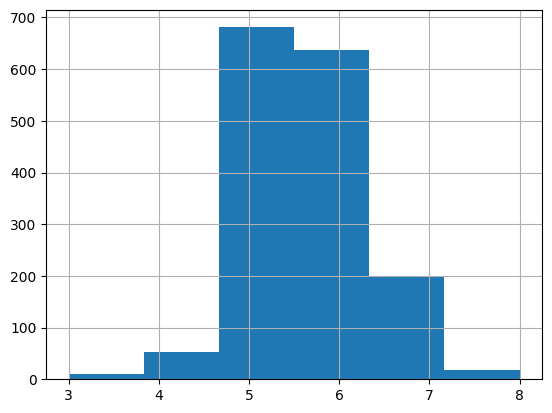

In [134]:
red_wine["quality"].hist(bins = 6)

#3. Discover and Visualize the Data to Gain Insights

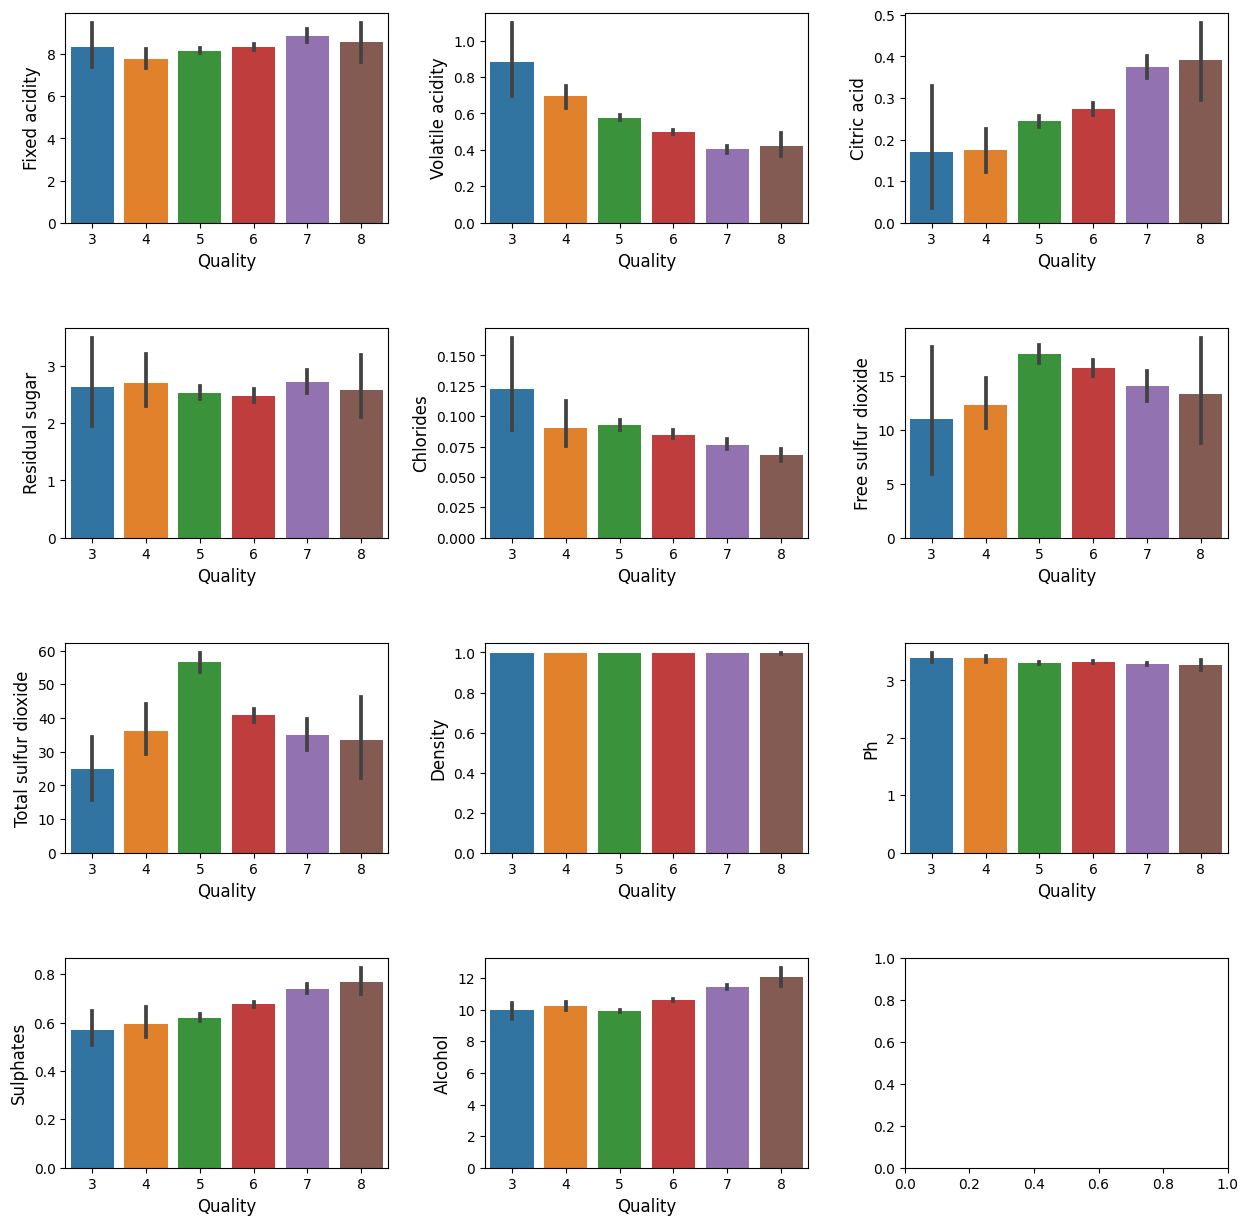

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

for i, column in enumerate(red_wine.columns[:-1]):
    row = i // 3
    col = i % 3
    sns.barplot(x='quality', y=column, data=red_wine, ax=axes[row, col])
    axes[row, col].set_xlabel('Quality', fontsize=12)
    axes[row, col].set_ylabel(column.capitalize(), fontsize=12)

plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()

# 4. Prepare the data for Machine Learning Algorithms


## 4.1 Classifying quality and assigning labels

In [136]:
bins = (2, 5, 6, 8)
group_names = ['bad', 'average', 'good']
red_wine['quality'] = pd.cut(red_wine['quality'], bins = bins, labels = group_names)

In [137]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_quality = LabelEncoder()

In [138]:
red_wine['quality'] = label_quality.fit_transform(red_wine['quality'])

In [139]:
red_wine['quality'].value_counts()

1    744
0    638
2    217
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

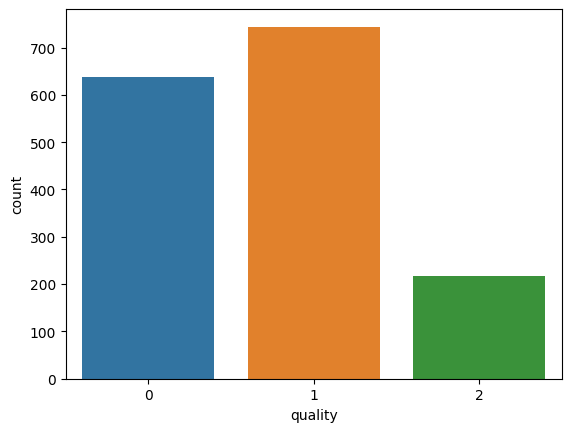

In [140]:
sns.countplot(x='quality', data=red_wine, order=[0,1,2])


In [141]:
red_wine['quality']
print(red_wine['quality'])
print(type(red_wine['quality']))

0       1
1       1
2       1
3       0
4       1
       ..
1594    1
1595    0
1596    0
1597    1
1598    0
Name: quality, Length: 1599, dtype: int64
<class 'pandas.core.series.Series'>


In [142]:
array = red_wine['quality']
print(array)
c = array.value_counts()[0]

print(c)

0       1
1       1
2       1
3       0
4       1
       ..
1594    1
1595    0
1596    0
1597    1
1598    0
Name: quality, Length: 1599, dtype: int64
638


In [143]:
X = red_wine.drop('quality', axis = 1)
y = red_wine['quality'].copy()

In [144]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [145]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=test_set_size, random_state=42)

for train_index, test_index in strat_shuff_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

## 4.2 Transformation Pipeline

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [147]:
full_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

red_wine_prepared = full_pipeline.fit_transform(X_train)
red_test = full_pipeline.transform(X_test)

In [148]:
red_wine_prepared[0]

array([-0.98963013,  1.10270258, -0.36513127,  3.75716056, -0.30866228,
        1.25019964,  0.98477552,  0.5061313 , -0.13280162, -0.69577545,
       -1.1493235 ])

In [149]:
red_test[0]

array([-0.58702489, -0.09922057, -0.46795671, -0.31139212, -0.37210365,
       -0.37038704, -0.56106156,  0.49551588,  1.36083617,  0.42353172,
       -0.86688916])

# 5. Select and Train a Model

##5.1 Support Vector Classifier

### 5.1.1 SVC Prediction




In [150]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import mean_squared_error

svc_reg = SVC(probability=True)
svc_reg.fit(red_wine_prepared, y_train)

wine_predictions = svc_reg.predict(red_test)

wine_predictions

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0])

### 5.1.2 SVC Metrics

In [151]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score

accuracy = cross_val_score(svc_reg, red_test, y_test,
                        scoring="accuracy", cv=5)

print(accuracy)

[0.5  0.5  0.5  0.75 0.75]


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [152]:
recall_score(y_test, wine_predictions, average='macro')

0.5046296296296297

In [153]:
from sklearn.metrics import f1_score, roc_auc_score

f1_score_default = f1_score(y_test, wine_predictions, average='macro')
f1_score_default

0.5381836945304438

In [154]:
y_pred = svc_reg.predict_proba(red_test)

In [155]:
roc_auc_score(y_test, y_pred, multi_class='ovr')

0.7640498118439294

In [156]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, wine_predictions, zero_division=0, average='micro')

0.55

In [157]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, wine_predictions)
conf_mx

array([[5, 3, 0],
       [4, 5, 0],
       [2, 0, 1]])

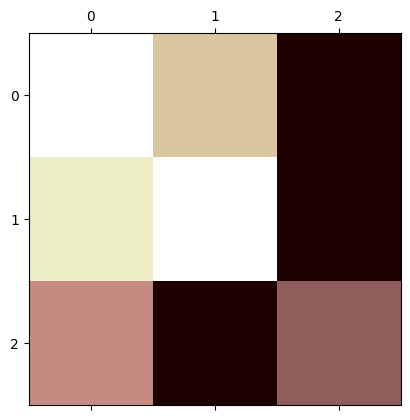

In [158]:
import matplotlib.pyplot as plt

plt.matshow(conf_mx, cmap=plt.cm.pink)
plt.show()

In [159]:
print(classification_report(y_test, wine_predictions))


              precision    recall  f1-score   support

           0       0.45      0.62      0.53         8
           1       0.62      0.56      0.59         9
           2       1.00      0.33      0.50         3

    accuracy                           0.55        20
   macro avg       0.69      0.50      0.54        20
weighted avg       0.61      0.55      0.55        20



### 5.1.3 SVC Grid-Search

In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : list(range(1, 100, 10)), 'gamma' :['scale', 'auto']},
]

svc_reg = SVC(probability=True)

grid_search = GridSearchCV(svc_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(red_wine_prepared, y_train)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid=[{'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [161]:
svc_best_search = grid_search.best_estimator_

In [162]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.868470442477687 {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.8181801079388623 {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
0.8045013649350604 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.9320932740250333 {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.868470442477687 {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.8212709732170271 {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.8048971293634575 {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.9314486294058103 {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.8670140109424549 {'C': 11, 'gamma': 'scale', 'kernel': 'linear'}
0.8135155973839535 {'C': 11, 'gamma': 'scale', 'kernel': 'poly'}
0.7973768774584031 {'C': 11, 'gamma': 'scale', 'kernel': 'rbf'}
0.9429463329510158 {'C': 11, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.8670140109424549 {'C': 11, 'gamma': 'auto', 'kernel': 'linear'}
0.8142932211260148 {'C': 11, 'gamma': 'auto', 'kernel': 'poly'}
0.7973768774584031 {'C': 11, 'gamma': 'auto', 'kernel': 'rbf'}
0.9287266864275635 {'C': 11, 

In [163]:
svc_grid_search_results = [[],[]]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  svc_grid_search_results[0].append(np.sqrt(-mean_score))
  svc_grid_search_results[1].append(params)
svc_grid_search_results
print(min(svc_grid_search_results[0]))
print(svc_grid_search_results[1][svc_grid_search_results[0].index(min(svc_grid_search_results[0]))])

0.7595743258525768
{'C': 91, 'gamma': 'auto', 'kernel': 'rbf'}


### 5.1.4 SVC Grid-Search Metrics

In [164]:
y_pred = svc_best_search.predict(red_test)

In [165]:
recall_score(y_test, y_pred, average='macro')

0.6944444444444443

In [166]:
f1scoresvc = f1_score(y_test, y_pred, average='macro')
f1scoresvc

0.7241830065359478

In [167]:
precision_score(y_test, y_pred, zero_division=0, average='macro')

0.7833333333333333

In [168]:
y_pred_proba = svc_best_search.predict_proba(red_test)

In [169]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

0.8165292632204397

In [170]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[6, 2, 0],
       [3, 6, 0],
       [1, 0, 2]])

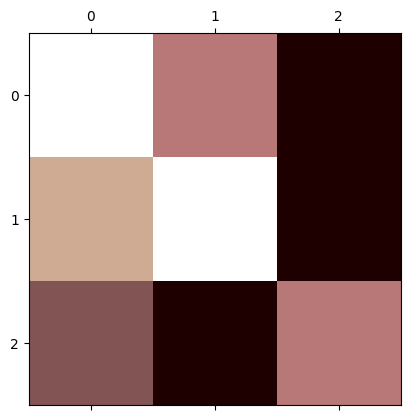

In [171]:
import matplotlib.pyplot as plt

plt.matshow(conf_mx, cmap=plt.cm.pink)
plt.show()

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.75      0.67      0.71         9
           2       1.00      0.67      0.80         3

    accuracy                           0.70        20
   macro avg       0.78      0.69      0.72        20
weighted avg       0.73      0.70      0.70        20



### 5.1.5 Accuracy and F1 Score

In [173]:
from sklearn.svm import SVC

accuracy_svc = cross_val_score(svc_best_search, red_test, y_test,
                        scoring="accuracy", cv=5)

accuracy_svc_default = cross_val_score(svc_reg, red_test, y_test,
                        scoring="accuracy", cv=5)

print("Accuracy with hyperparameters: " + str(accuracy_svc))
print("F1 Score with hyperparameters: " + str(f1scoresvc))
print("Accuracy without hyperparameters: " + str(accuracy_svc_default))
print("F1 Score without hyperparameters: " + str(f1_score_default))

Accuracy with hyperparameters: [1.   0.75 0.25 0.5  1.  ]
F1 Score with hyperparameters: 0.7241830065359478
Accuracy without hyperparameters: [0.5  0.5  0.5  0.75 0.75]
F1 Score without hyperparameters: 0.5381836945304438


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


##5.2 Random Forest

###5.2.1 Random Forest Prediction

In [174]:
from sklearn.ensemble import RandomForestClassifier

forest_cl = RandomForestClassifier()
forest_cl.fit(red_wine_prepared, y_train)
wine_predictions = forest_cl.predict(red_test)

### 5.3.2. Random Forest Metrics

In [175]:
accuracy = cross_val_score(forest_cl, red_wine_prepared, y_train,
                        scoring="accuracy", cv=5)

accuracy

array([0.71518987, 0.71202532, 0.76582278, 0.69620253, 0.73968254])

In [176]:
precision_score(y_test, wine_predictions, average = 'macro')

0.7833333333333333

In [177]:
recall_score(y_test, wine_predictions, average = 'macro')

0.6944444444444443

In [178]:
f1_score(y_test, wine_predictions, average = 'macro')

0.7241830065359478

In [179]:
from sklearn.metrics import roc_auc_score

y_pred = forest_cl.predict_proba(red_test)

In [180]:
roc_auc_score(y_test, y_pred, multi_class='ovr')

0.8605355020796197

In [181]:
conf_mx = confusion_matrix(y_test, wine_predictions)
conf_mx

array([[6, 2, 0],
       [3, 6, 0],
       [1, 0, 2]])

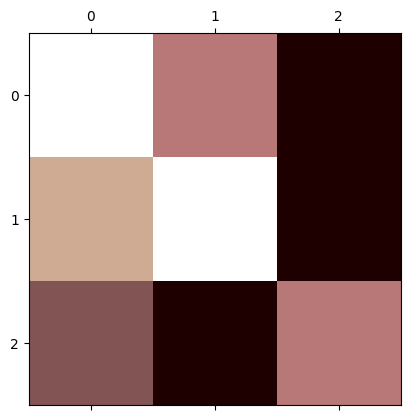

In [182]:
plt.matshow(conf_mx, cmap=plt.cm.pink)
plt.show()

In [183]:
print(classification_report(y_test, wine_predictions))


              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.75      0.67      0.71         9
           2       1.00      0.67      0.80         3

    accuracy                           0.70        20
   macro avg       0.78      0.69      0.72        20
weighted avg       0.73      0.70      0.70        20



### 5.3.3 Random Forest Grid Search

In [184]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'criterion': ['gini', 'entropy', 'log_loss'],
    'bootstrap': [False, True], 'max_features': ['sqrt', 'log2']}]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(red_wine_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [False, True],
                          'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_features': ['sqrt', 'log2']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [185]:
forest_best_search = grid_search.best_estimator_

In [186]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.7104546648603134 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt'}
0.7250006062367125 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2'}
0.7289349713694857 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt'}
0.7104475945551525 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2'}
0.7245709170700777 {'bootstrap': False, 'criterion': 'log_loss', 'max_features': 'sqrt'}
0.7241409729354817 {'bootstrap': False, 'criterion': 'log_loss', 'max_features': 'log2'}
0.7271770193842726 {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt'}
0.7149034901306079 {'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2'}
0.7280427271650052 {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt'}
0.7193010582901318 {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2'}
0.7037215575357104 {'bootstrap': True, 'criterion': 'log_loss', 'max_features': 'sqrt'}
0.7188567822155898 {'bootstrap': True, 'criter

In [187]:
forest_grid_search_results = [[],[]]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  forest_grid_search_results[0].append(np.sqrt(-mean_score))
  forest_grid_search_results[1].append(params)
forest_grid_search_results
print(min(forest_grid_search_results[0]))
print(forest_grid_search_results[1][forest_grid_search_results[0].index(min(forest_grid_search_results[0]))])

0.7037215575357104
{'bootstrap': True, 'criterion': 'log_loss', 'max_features': 'sqrt'}


### 5.3.4 Random Forest Grid Search Metrics

In [188]:
accuracy = cross_val_score(forest_best_search, red_wine_prepared, y_train,
                        scoring="accuracy", cv=5)

accuracy

array([0.73101266, 0.68670886, 0.74683544, 0.69936709, 0.74285714])

In [189]:
y_pred = forest_best_search.predict(red_test)

In [190]:
precision_score(y_test, y_pred, average = 'macro')

0.7833333333333333

In [191]:
recall_score(y_test, y_pred, average='macro')

0.6944444444444443

In [192]:
f1scoreforest = f1_score(y_test, y_pred, average='macro')
f1scoreforest

0.7241830065359478

In [194]:
y_pred_proba = forest_best_search.predict_proba(red_test)

In [196]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

0.8383869330560506

In [197]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[6, 2, 0],
       [3, 6, 0],
       [1, 0, 2]])

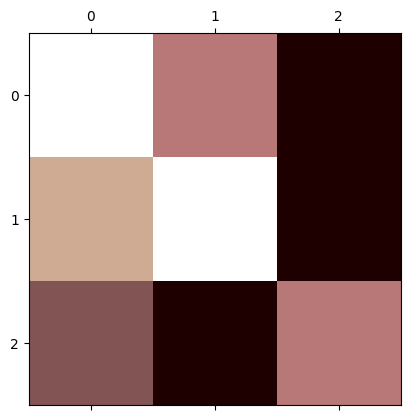

In [198]:
plt.matshow(conf_mx, cmap=plt.cm.pink)
plt.show()

In [199]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.75      0.67      0.71         9
           2       1.00      0.67      0.80         3

    accuracy                           0.70        20
   macro avg       0.78      0.69      0.72        20
weighted avg       0.73      0.70      0.70        20



In [200]:
accuracy_forest = cross_val_score(forest_best_search, red_test, y_test,
                        scoring="accuracy", cv=5)

accuracy_forest_default = cross_val_score(forest_cl, red_test, y_test,
                        scoring="accuracy", cv=5)

print("Accuracy with hyperparameters: " + str(accuracy_forest))
print("F1 Score with hyperparameters: " + str(f1scoreforest))
print("Accuracy without hyperparameters: " + str(accuracy_forest_default))
print("Accuracy without hyperparameters: " + str(accuracy_svc_default))
print("F1 Score without hyperparameters: " + str(f1_score_default))



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy with hyperparameters: [0.25 0.75 0.25 0.75 0.75]
F1 Score with hyperparameters: 0.7241830065359478
Accuracy without hyperparameters: [0.5  0.75 0.5  0.75 0.75]
Accuracy without hyperparameters: [0.5  0.5  0.5  0.75 0.75]
F1 Score without hyperparameters: 0.5381836945304438


##5.3 Extra Trees

###5.3.1 Extra Trees Prediction

In [201]:
from sklearn.ensemble import ExtraTreesClassifier

extra_cl = ExtraTreesClassifier()
extra_cl.fit(red_wine_prepared, y_train)
wine_predictions = extra_cl.predict(red_test)
wine_predictions

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0])

###5.3.2 Extra Trees Metrics

In [202]:
accuracy = cross_val_score(extra_cl, red_wine_prepared, y_train,
                        scoring="accuracy", cv=5)

accuracy

array([0.74050633, 0.6835443 , 0.74683544, 0.70886076, 0.71111111])

In [203]:
precision_score(y_test, wine_predictions, average = 'macro')

0.7833333333333333

In [204]:
recall_score(y_test, wine_predictions, average = 'macro')

0.6944444444444443

In [205]:
f1_score(y_test, wine_predictions, average = 'macro')

0.7241830065359478

In [206]:
y_pred = extra_cl.predict_proba(red_test)

In [207]:
roc_auc_score(y_test, y_pred, multi_class='ovr')

0.9075528570013863

In [208]:
conf_mx = confusion_matrix(y_test, wine_predictions)
conf_mx

array([[6, 2, 0],
       [3, 6, 0],
       [1, 0, 2]])

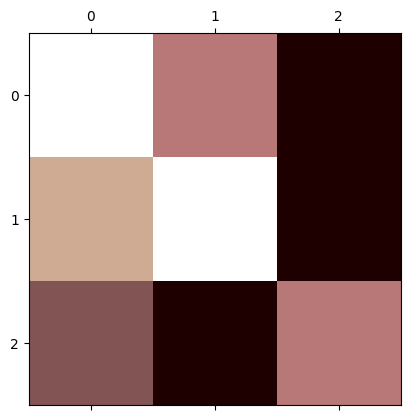

In [209]:
plt.matshow(conf_mx, cmap=plt.cm.pink)
plt.show()

In [210]:
print(classification_report(y_test, wine_predictions))


              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.75      0.67      0.71         9
           2       1.00      0.67      0.80         3

    accuracy                           0.70        20
   macro avg       0.78      0.69      0.72        20
weighted avg       0.73      0.70      0.70        20



### 5.3.3 Extra Trees Grid-Search

In [211]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'criterion': ['gini', 'entropy', 'log_loss'],
    'bootstrap': [False, True], 'max_features': ['sqrt', 'log2']}]

extra_reg = ExtraTreesClassifier()

grid_search = GridSearchCV(extra_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(red_wine_prepared, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid=[{'bootstrap': [False, True],
                          'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_features': ['sqrt', 'log2']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [212]:
extra_best_search = grid_search.best_estimator_

In [213]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.7223991684445791 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt'}
0.7157798317434216 {'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2'}
0.7241284868732247 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt'}
0.7237038325803872 {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2'}
0.7228329282996713 {'bootstrap': False, 'criterion': 'log_loss', 'max_features': 'sqrt'}
0.7267582934087347 {'bootstrap': False, 'criterion': 'log_loss', 'max_features': 'log2'}
0.7184164265556201 {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt'}
0.7297930875067495 {'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2'}
0.725871677768113 {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt'}
0.7175531055697822 {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2'}
0.7153333687244634 {'bootstrap': True, 'criterion': 'log_loss', 'max_features': 'sqrt'}
0.7170895341867604 {'bootstrap': True, 'criteri

In [214]:
extra_grid_search_results = [[],[]]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  extra_grid_search_results[0].append(np.sqrt(-mean_score))
  extra_grid_search_results[1].append(params)
extra_grid_search_results
print(min(extra_grid_search_results[0]))
print(extra_grid_search_results[1][extra_grid_search_results[0].index(min(extra_grid_search_results[0]))])

0.7153333687244634
{'bootstrap': True, 'criterion': 'log_loss', 'max_features': 'sqrt'}


### 5.3.4 Extra Trees Grid-Search Metrics

In [215]:
accuracy = cross_val_score(extra_best_search, red_wine_prepared, y_train,
                        scoring="accuracy", cv=5)

accuracy

array([0.71835443, 0.71202532, 0.75632911, 0.71518987, 0.73968254])

In [216]:
y_pred = extra_best_search.predict(red_test)

In [217]:
precision_score(y_test, y_pred, average = 'macro')

0.7833333333333333

In [218]:
recall_score(y_test, y_pred, average='macro')

0.6944444444444443

In [219]:
f1scoreextra = f1_score(y_test, y_pred, average='macro')
f1scoreextra

0.7241830065359478

In [220]:
y_pred_proba = extra_best_search.predict_proba(red_test)

In [221]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

0.890956129926718

In [222]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[6, 2, 0],
       [3, 6, 0],
       [1, 0, 2]])

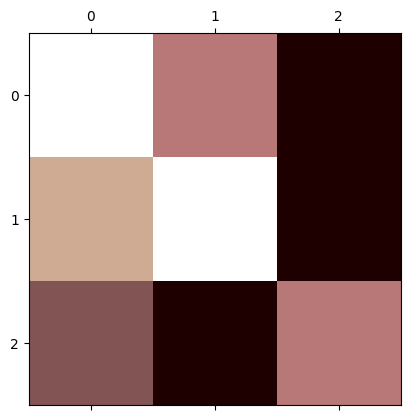

In [223]:
plt.matshow(conf_mx, cmap=plt.cm.pink)
plt.show()

In [224]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.75      0.67      0.71         9
           2       1.00      0.67      0.80         3

    accuracy                           0.70        20
   macro avg       0.78      0.69      0.72        20
weighted avg       0.73      0.70      0.70        20



In [225]:
accuracy_trees = cross_val_score(extra_best_search, red_test, y_test,
                        scoring="accuracy", cv=5)

accuracy_trees_default = cross_val_score(extra_cl, red_test, y_test,
                        scoring="accuracy", cv=5)

print("Accuracy with hyperparameters: " + str(accuracy_trees))
print("Accuracy without hyperparameters: " + str(accuracy_trees_default))

print("F1 Score with hyperparameters: " + str(f1scoreextra))
print("F1 Score without hyperparameters: " + str(f1_score_default))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy with hyperparameters: [1.   0.75 0.5  0.5  0.75]
Accuracy without hyperparameters: [0.5  0.75 0.25 0.5  0.75]
F1 Score with hyperparameters: 0.7241830065359478
F1 Score without hyperparameters: 0.5381836945304438


#6. Results

In [226]:
print("SVC:", min(svc_grid_search_results[0]))
print("SVC F1 Score", f1scoresvc)
print("Random Forest Classifier: ", min(forest_grid_search_results[0]))
print("Random Forest F1 Score", f1scoreforest)
print("Extra Trees Classifier: ",  min(extra_grid_search_results[0]))
print("Extra Trees F1 Score", f1scoreextra)


print("\n\nBest F1 Score: ", max(f1scoresvc, f1scoreforest, f1scoreextra))
print("Extra Trees Classifier")

SVC: 0.7595743258525768
SVC F1 Score 0.7241830065359478
Random Forest Classifier:  0.7037215575357104
Random Forest F1 Score 0.7241830065359478
Extra Trees Classifier:  0.7153333687244634
Extra Trees F1 Score 0.7241830065359478


Best F1 Score:  0.7241830065359478
Extra Trees Classifier


#7. Export Model

In [227]:
import joblib
joblib.dump (extra_best_search, "my_model.pkl")

['my_model.pkl']

#8. Conclusions

La matriz de confusión y el classification report de SVC sugieren que el modelo ha obtenido una precisión moderada en la clasificación de las muestras en las tres clases. La matriz de confusión muestra que el modelo ha clasificado correctamente la mayoría de las muestras de la clase 0 y 1, pero ha tenido dificultades en la clasificación de la clase 2, con solo 2 de las 3 muestras clasificadas correctamente. En general, el modelo SVM ha logrado una precisión aceptable en la clasificación de las muestras en las tres clases, con un F1 score de 0.724183006535947 con hiperparámetros. 

Random Forest ha logrado una precisión razonable en las tres clases. De los 8 casos de la clase 0, el modelo ha clasificado correctamente 6 de ellos, pero ha clasificado incorrectamente 2 casos de la clase 0. De los 9 casos de la clase 1, el modelo ha clasificado correctamente 6 de ellos y ha clasificado incorrectamente 3 casos de la clase 1. De los 3 casos de la clase 2, el modelo ha clasificado correctamente 2 de ellos y ha clasificado incorrectamente 1 caso de la clase 2. En general, el modelo Random Forest ha logrado una precisión aceptable en la clasificación de las tres clases.

Extra Trees ha clasificado correctamente 6 de los 8 casos de la clase 0 y ha clasificado incorrectamente 2 de ellos como pertenecientes a la clase 1. Además, ha clasificado correctamente 6 de los 9 casos de la clase 1 y ha clasificado incorrectamente 3 de ellos como pertenecientes a la clase 0. Finalmente, el modelo ha clasificado correctamente 2 de los 3 casos de la clase 2 y ha clasificado incorrectamente 1 de ellos como perteneciente a la clase 0. En general, el modelo tiene un rendimiento aceptable en la clasificación de las tres clases, aunque puede haber margen de mejora, especialmente en la clasificación de los casos de la clase 0 y 1, donde se producen las principales confusiones.

